In [ ]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNet

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip the dataset to /content/Unzipped
!unzip -q '/content/drive/MyDrive/DatasetUAP/archive.zip' -d '/content/Unzipped/'

In [ ]:
# Step 2: Load Dataset
base_dir = '/content/Unzipped/'  # Adjust path to your dataset
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # Gunakan 20% data untuk validasi
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Data untuk training
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Data untuk validasi
)

Found 12519 images belonging to 7 classes.
Found 3126 images belonging to 7 classes.


In [ ]:
# Step 3: Build Custom CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Custom CNN
history_cnn = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


392/392 ━━━━━━━━━━━━━━━━━━━━ 421s 1s/step - accuracy: 0.2698 - loss: 1.8663 - val_accuracy: 0.3730 - val_loss: 1.5720
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 415s 1s/step - accuracy: 0.3556 - loss: 1.5732 - val_accuracy: 0.4415 - val_loss: 1.3414
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.3951 - loss: 1.4364 - val_accuracy: 0.4766 - val_loss: 1.2820
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 409s 1s/step - accuracy: 0.4181 - loss: 1.3621 - val_accuracy: 0.4744 - val_loss: 1.2267
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 416s 1s/step - accuracy: 0.4322 - loss: 1.3237 - val_accuracy: 0.4837 - val_loss: 1.2186
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 420s 1s/step - accuracy: 0.4378 - loss: 1.2931 - val_accuracy: 0.5150 - val_loss: 1.1400
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 414s 1s/step - accuracy: 0.4606 - loss: 1.2490 - val_accuracy: 0.5352 - val_loss: 1.0945
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 438s 1s/step - accuracy: 0.4731 - loss: 1.2396 - val_accuracy: 0.528

In [ ]:
# Step 4: Fine-tune MobileNet Model
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
mobilenet_model.trainable = False

model_mobilenet = Sequential([
    mobilenet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train MobileNet
history_mobilenet = model_mobilenet.fit(train_generator, validation_data=val_generator, epochs=10)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 282s 704ms/step - accuracy: 0.3191 - loss: 2.2630 - val_accuracy: 0.4658 - val_loss: 1.2183
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 307s 781ms/step - accuracy: 0.3882 - loss: 1.4510 - val_accuracy: 0.4840 - val_loss: 1.1279
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 292s 704ms/step - accuracy: 0.3956 - loss: 1.4029 - val_accuracy: 0.4949 - val_loss: 1.0887
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 283s 716ms/step - accuracy: 0.3985 - loss: 1.3972 - val_accuracy: 0.4859 - val_loss: 1.1122
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 287s 729ms/step - accuracy: 0.3953 - loss: 1.3975 - val_accuracy: 0.5131 - val_loss: 1.0803
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 279s 709ms/step - accuracy: 0.4078 - loss: 1.3723 - val_accuracy: 0.4661 - val_loss: 1.1302
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 280s 711ms/step - accuracy: 0.4054 - loss: 1.3846 - val_accuracy: 0.5256 - val_loss: 1.0405
Epoch 8/10
392/392 ━━━━━━

In [ ]:
# Step 5: Evaluate Models
print("Custom CNN Evaluation:")
cnn_loss, cnn_acc = cnn_model.evaluate(val_generator)
print(f"Loss: {cnn_loss}, Accuracy: {cnn_acc}")

print("MobileNet Evaluation:")
mobilenet_loss, mobilenet_acc = model_mobilenet.evaluate(val_generator)
print(f"Loss: {mobilenet_loss}, Accuracy: {mobilenet_acc}")

# Generate Classification Reports
val_generator.reset()
predictions_cnn = cnn_model.predict(val_generator)
predictions_mobilenet = model_mobilenet.predict(val_generator)

print("Classification Report for Custom CNN:")
print(classification_report(val_generator.classes, np.argmax(predictions_cnn, axis=1), target_names=list(train_generator.class_indices.keys())))

print("Classification Report for MobileNet:")
print(classification_report(val_generator.classes, np.argmax(predictions_mobilenet, axis=1), target_names=list(train_generator.class_indices.keys())))

Custom CNN Evaluation:
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 541ms/step - accuracy: 0.5741 - loss: 1.0289
Loss: 1.0422590970993042, Accuracy: 0.5690978765487671
MobileNet Evaluation:
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 540ms/step - accuracy: 0.4768 - loss: 1.0625
Loss: 1.0605441331863403, Accuracy: 0.4865643084049225
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 405ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 556ms/step
Classification Report for Custom CNN:
                       precision    recall  f1-score   support

            Big Truck       0.08      0.03      0.05       115
             City Car       0.30      0.51      0.38       931
Multi Purpose Vehicle       0.19      0.16      0.17       529
                Sedan       0.18      0.00      0.01       523
Sport Utility Vehicle       0.14      0.12      0.13       365
                Truck       0.10      0.12      0.11       230
                  Van       0.16      0.16      0.16       433

             accuracy                           0.23      3126
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


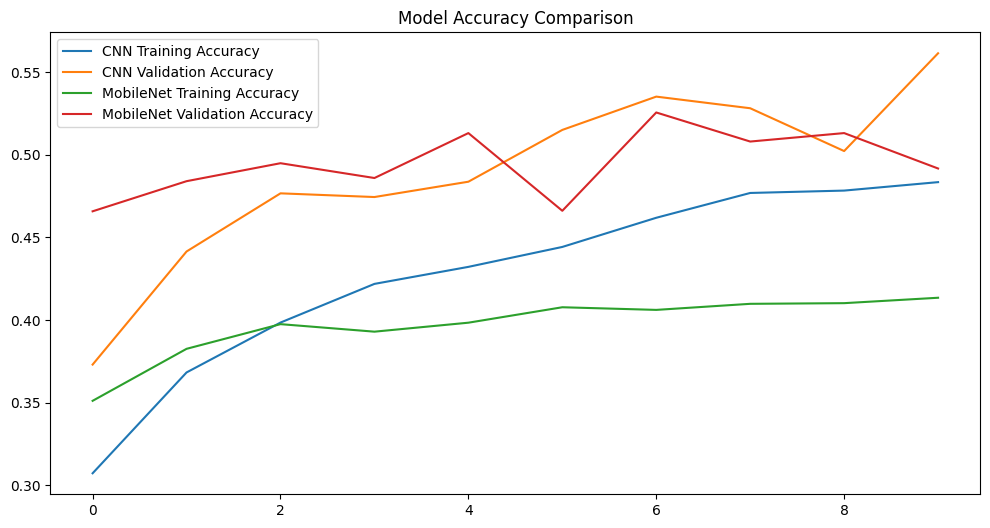

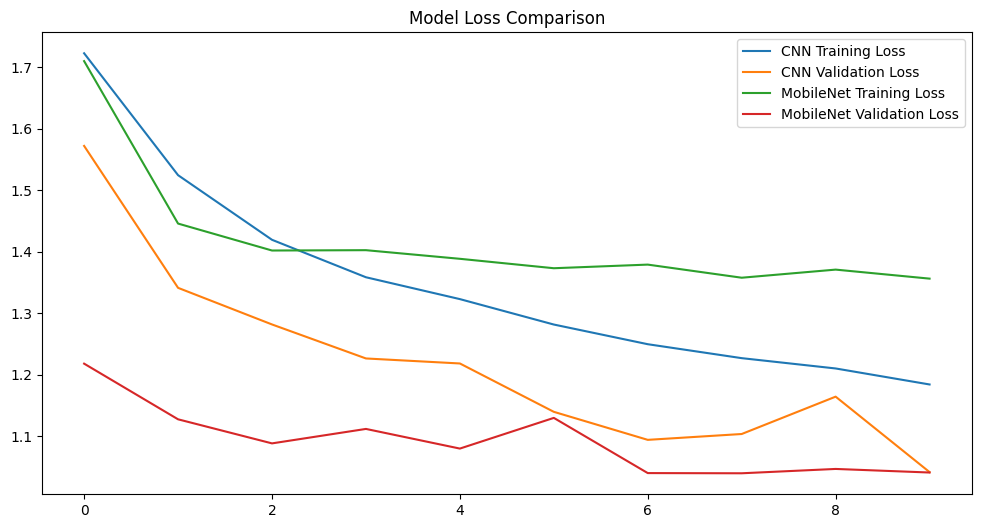

In [ ]:
# Step 6: Visualize Training History
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_mobilenet.history['accuracy'], label='MobileNet Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.plot(history_mobilenet.history['loss'], label='MobileNet Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='MobileNet Validation Loss')
plt.legend()
plt.title('Model Loss Comparison')
plt.show()

In [ ]:
# Next Steps: Save Models and Prepare for Deployment
cnn_model.save('/content/drive/MyDrive/Models/cnn_model.h5')
model_mobilenet.save('/content/drive/MyDrive/Models/mobilenet_model.h5')